In [48]:
words = open('names.txt', 'r').read().splitlines()

In [49]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [50]:
len(words)

32033

In [51]:
min(len(w) for w in words)

2

In [52]:
max(len(w) for w in words)

15

## Bigram

In [53]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [54]:
sorted(b.items(), key = lambda kv: -kv[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [55]:
import torch

In [56]:
N = torch.zeros((27,27), dtype=torch.int32)

In [57]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [58]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        N[ix1,ix2] += 1

In [59]:
itos = {i:s for s,i in stoi.items()}

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

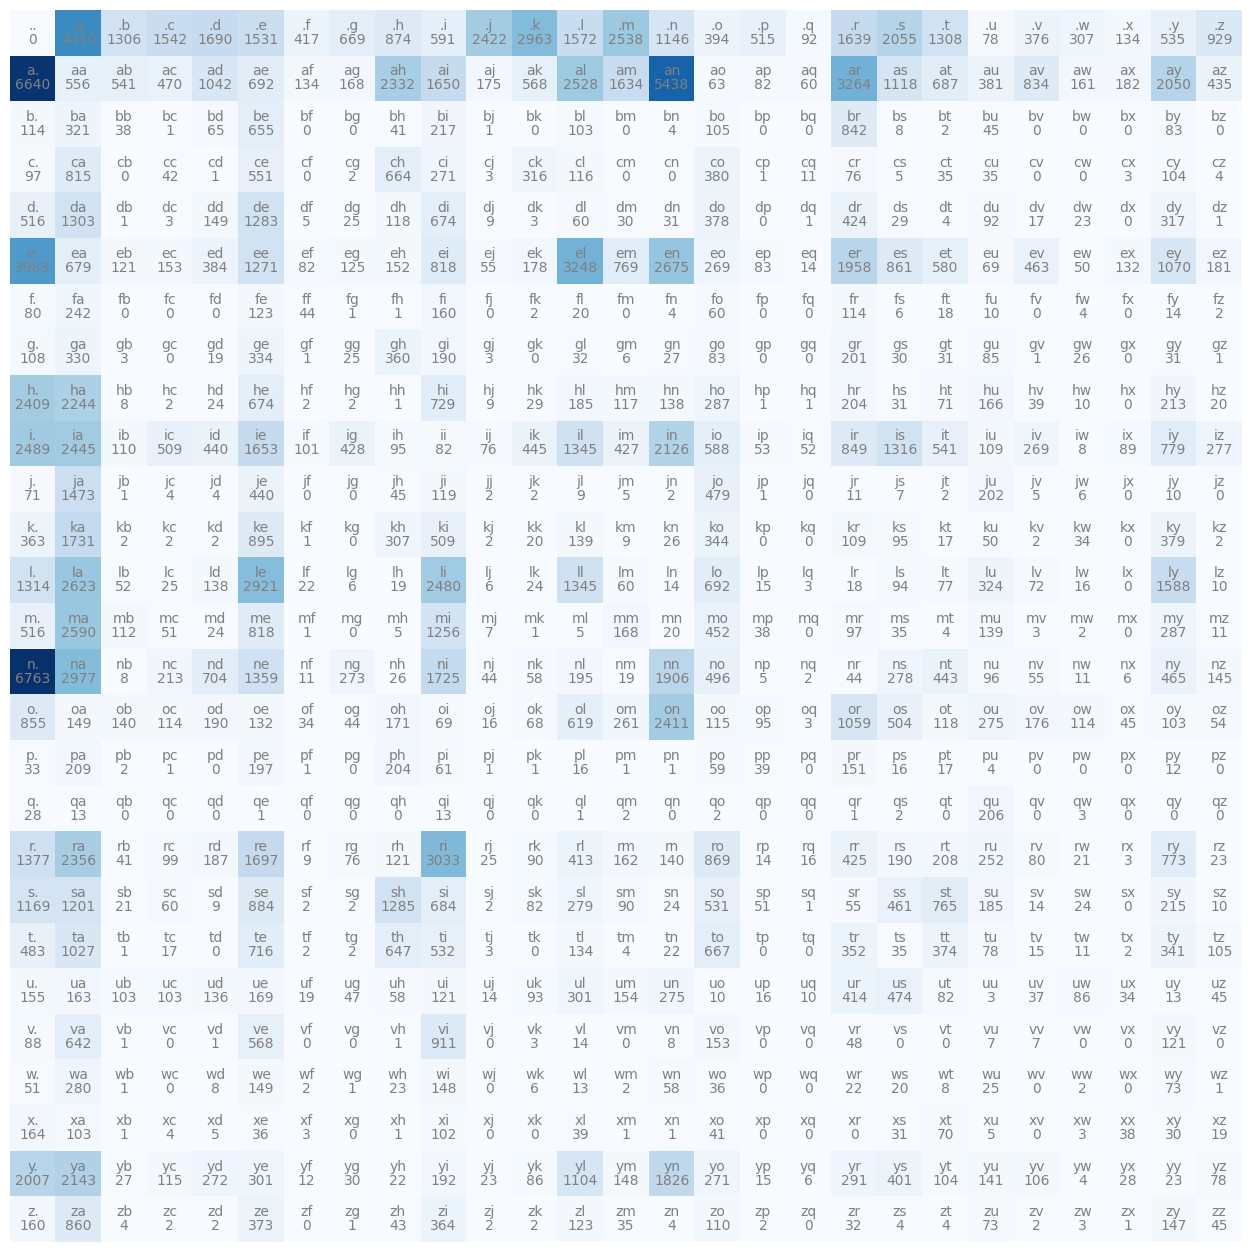

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')


In [61]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [62]:
p = N[0].float()
p = p / p.sum()
p.sum()


tensor(1.)

In [63]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [64]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)

p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [65]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [84]:
P = (N + 1).float()
P /= P.sum(1, keepdim=True) # Vectorized Across Rows

In [85]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


## Loss Function

In [86]:
log_likelihood = 0.0
neg_log_likelihood = 0.0
norm_neg_log_likelihood = 0.0

n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1][ix2]
        logprob = torch.log(prob)
        log_likelihood+=logprob
        # print(f"{ch1}{ch2}: {prob:.4f}, {logprob:.4f}")
        n+=1
print(f"{log_likelihood=}")
neg_log_likelihood = -log_likelihood
print(f"{neg_log_likelihood=}")
norm_neg_log_likelihood = neg_log_likelihood / n
print(f"{norm_neg_log_likelihood=}")

log_likelihood=tensor(-559951.5625)
neg_log_likelihood=tensor(559951.5625)
norm_neg_log_likelihood=tensor(2.4544)
